<a href="https://colab.research.google.com/github/thenoorfatima/PyTorch/blob/main/PyTorch%20Binary%20Classification%20circles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Architecture of a classification neural network

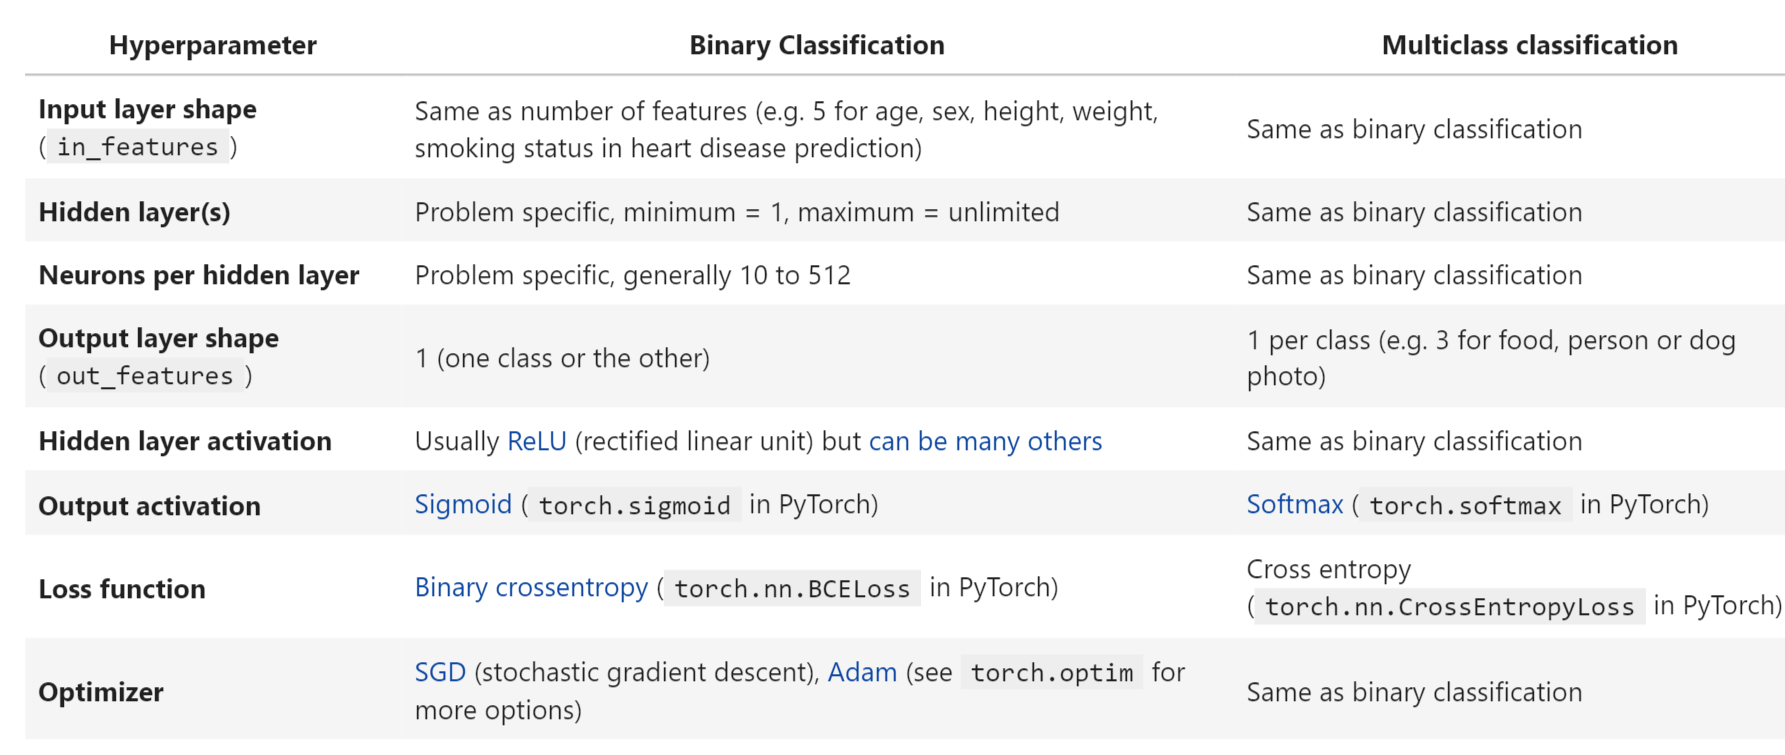


Note: This dataset is toy problem (to try and test things out on) in ML.

#Data Preprocessing

In [6]:
## CLASSIFICATION DATA

# Using make_circles() method from Scikit-Learn to generate 2 circles with different coloured dots.

import sklearn

from sklearn.datasets import make_circles
n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42) # noise = randomness

In [7]:
len(X), len(y)

(1000, 1000)

In [8]:
print(f'First 5 samples of X:\n {X[:5]}')
print(f'First 5 samples of X:\n {y[:5]}')  # output: 2 X values per y value.

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of X:
 [1 1 1 1 0]


In [9]:
# Making Dataframe of Circle Data

import pandas as pd
circles = pd.DataFrame({'X1':X[:,0], 'X2':X[:,1], 'label': y})
circles.head(10)

# output: each pair of X features (X1 and X2) has a label (y) value of either 0 or 1.

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [10]:
# Check different labels for values of each class
circles.label.value_counts()

,count
label,
1,500
0,500


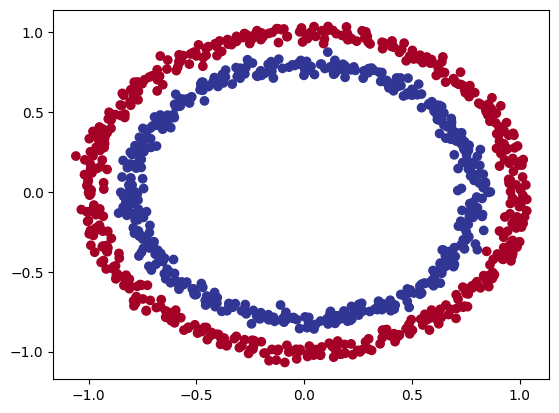

In [11]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap=plt.cm.RdYlBu);

In [12]:
## Check input output shapes

X.shape, y.shape

# output: match on the first dimension of each. Values and shapes of a single sample (features and labels).
# y is scalar - no features, 2 samples of x = 1 y label two inputs for one output. x is 1000 of size 2 each.

((1000, 2), (1000,))

In [13]:
# First example of features and labels

X_sample = X[0]
y_sample = y[0]

X_sample, y_sample, X_sample.shape, y_sample.shape

# second dimension for X means it has two features (vector) where as y has a single feature (scalar).


(array([0.75424625, 0.23148074]), 1, (2,), ())

In [14]:
## Turn data into tensors and create train and test splits

# Turn data into tensors float32, our data is in NumPy arrays
import torch

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [15]:
## Split train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

# Creating Classification Model

PyTorch neural network to classify dots into red (0) or blue (1).

1. Setting up device agnostic code.
2. Constructing a model by subclassing nn.Module.
3. Defining a loss function and optimizer.
4. Creating a training loop.

Features and labels - referred to as supervised learning. Data is telling model what the outputs should be given a certain input.

* Create a model class that:
1. Subclasses nn.Module.
2. Creates 2 `nn.Linear` layers in the constructor capable of handling the input and output shapes of X and y.
3. Defines a forward() method containing the forward pass computation of the model.
4. Instantiates the model class and sends it to the target device.

In [16]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"

In [17]:
class Circle(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2, out_features=5)  # 5 hidden units or neurons, allows model to learn patterns from 5 nos rather than 2, potentially leading to better outputs.
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  def forward(self,x):
    return self.layer_2(self.layer_1(x))

m0 = Circle().to(device)
m0

Circle(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)


## `nn.Sequential`
Performs a forward pass computation of the input data through the layers in the order they appear.
* It always runs in straight-forward sequential order. For other, define own custom `nn.Module` subclass.

In [18]:
m0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

m0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
m0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5189, -0.4967],
                      [-0.0727, -0.4430],
                      [ 0.1269, -0.1200],
                      [ 0.6967,  0.1271],
                      [ 0.2329,  0.4878]])),
             ('0.bias', tensor([-0.0113,  0.4902, -0.1958,  0.2105,  0.0763])),
             ('1.weight',
              tensor([[-0.3057,  0.2931,  0.0615, -0.1365,  0.4387]])),
             ('1.bias', tensor([0.2838]))])

In [20]:
## Predictions untrained

with torch.inference_mode():
  u_pred = m0(X_test.to(device))

print(f"Length of predictions: {len(u_pred)}, Shape: {u_pred.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{u_pred[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[0.6298],
        [0.6239],
        [0.4732],
        [0.6749],
        [0.2001],
        [0.1987],
        [0.3986],
        [0.2983],
        [0.4849],
        [0.6205]])

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


## Loss function and Optimizer
Different problem types require different loss functions. However, the same optimizer function can be used across different probs.
Optimizer: optimize the params such that loss goes down.

* PyTorch has two binary cross entropy implementations:

1. `torch.nn.BCELoss()` - Creates a loss function that measures the binary cross entropy between the target (label) and input (features).
2. `torch.nn.BCEWithLogitsLoss()` - same but has a sigmoid layer (nn.Sigmoid) built in. It's more numerically stable than using torch.nn.BCELoss() after a `nn.Sigmoid` layer.

For advanced usage, separate the combination of nn.Sigmoid and torch.nn.BCELoss().

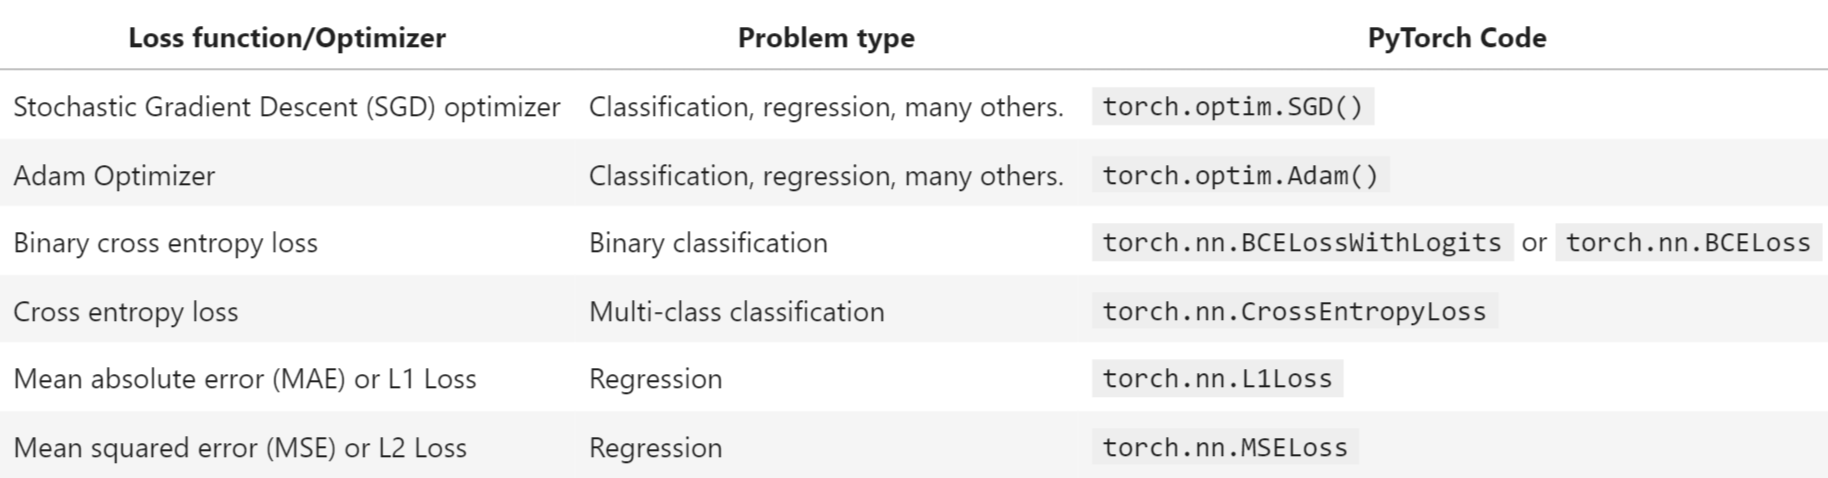

## Evaluation Metrics
If a loss function measures how wrong your model is, evaluation metrics may measure how right it is.
* Accuracy = total correct predictions / total predictions.
`TP/ TP+TN * 100`

In [21]:
lossf = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = m0.parameters(), lr = 0.1)

def accuracy(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/ len(y_pred)) * 100         # eq Computes element-wise equality
  return acc

# Train model

Going from raw-model-outputs (logits) to predicted labels.
* logits -> prediction probabilities -> prediction labels

* The raw outputs (unmodified) of forward pass (eqn `y = mc + c`, inside nn.linear) and, raw outputs of our model are logits.

* That's what our model outputs when it takes in the input data logit (x in the equation or X_test in the code)

* Convert **logits** into **prediction probability** by passing them through an activation function.
* Convert model prediction probability to **prediction labels** by rounding off/ using `argmax()`.

In [22]:
# View first 5 outputs of the forward pass on the test data ""LOGITS"" (raw outputs) UNTRAINED

m0.eval()
with torch.inference_mode():
  y_logits = m0(X_test.to(device))[:5]
y_logits

tensor([[0.6298],
        [0.6239],
        [0.4732],
        [0.6749],
        [0.2001]])

In [23]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [24]:
# (Sigmoid) Activation function on model logits to turn them into ""Prediction Probab"".

y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.6524],
        [0.6511],
        [0.6161],
        [0.6626],
        [0.5499]])

* Outputs have some kind of consistency but are still random. They're now in the form of prediction probabilities.
* The values are now how much the model thinks the data point belongs to one class or another; Binary classification: 0 or 1. These values can be viewed as a decision boundary.
* If y_pred_probs >= 0.5, y=1 (class 1)
* If y_pred_probs < 0.5, y=0 (class 0)
* To turn our prediction probabilities into prediction labels, round the outputs of the sigmoid activation function.
* Use of the sigmoid activation function is not required when passing our model's raw outputs to the nn.BCEWithLogitsLoss (the "logits" in logits loss is because it works on the model's raw logits output), this is because it has a sigmoid function built-in.

In [25]:
# 1. Find the ""Predicted labels"" (round off prediction probabilities)
y_preds = torch.round(y_pred_probs)

# 2. In full (logits => pp => p labels)
y_pred_labels = torch.round(torch.sigmoid(m0(X_test.to(device))[:5]))

# Check for equality of both forms 1, 2
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 1., 1., 1.])

In [26]:
y_test[:5]

# we'll be able to compare our model's predictions to the test labels to see how well it's performing.

tensor([1., 0., 1., 0., 1.])

In [27]:
## Building a training and testing loop

torch.manual_seed(42)
epochs = 1000

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    m0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = m0(X_train).squeeze()              # squeeze removes extra `1` dimensions, but it needs model and data on same device
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

    # 2. Calculate loss/accuracy
    # loss = loss(torch.sigmoid(y_logits), Using nn.BCELoss need torch.sigmoid(), pred probab as input.

    loss = lossf(y_logits,y_train)                 # Using nn.BCEWithLogitsLoss works with raw logits
    acc = accuracy(y_true=y_train, y_pred=y_pred)      # Compares labels to labels

    optimizer.zero_grad() #3

    loss.backward()       #4

    optimizer.step()      #5

    ### Testing
    m0.eval()
    with torch.inference_mode():

        # 1. Forward pass
        test_logits = m0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Caculate loss/accuracy
        test_loss = lossf(test_logits, y_test)
        test_acc = accuracy(y_true=y_test, y_pred=test_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.71792, Accuracy: 50.00% | Test loss: 0.72086, Test acc: 50.00%
Epoch: 10 | Loss: 0.70537, Accuracy: 50.00% | Test loss: 0.70885, Test acc: 50.00%
Epoch: 20 | Loss: 0.69977, Accuracy: 58.63% | Test loss: 0.70333, Test acc: 55.00%
Epoch: 30 | Loss: 0.69710, Accuracy: 53.00% | Test loss: 0.70060, Test acc: 54.00%
Epoch: 40 | Loss: 0.69572, Accuracy: 52.25% | Test loss: 0.69911, Test acc: 50.50%
Epoch: 50 | Loss: 0.69495, Accuracy: 52.00% | Test loss: 0.69822, Test acc: 49.50%
Epoch: 60 | Loss: 0.69446, Accuracy: 51.50% | Test loss: 0.69762, Test acc: 49.50%
Epoch: 70 | Loss: 0.69413, Accuracy: 51.25% | Test loss: 0.69718, Test acc: 49.00%
Epoch: 80 | Loss: 0.69390, Accuracy: 51.12% | Test loss: 0.69685, Test acc: 50.00%
Epoch: 90 | Loss: 0.69372, Accuracy: 50.75% | Test loss: 0.69658, Test acc: 51.00%
Epoch: 100 | Loss: 0.69357, Accuracy: 51.00% | Test loss: 0.69635, Test acc: 50.00%
Epoch: 110 | Loss: 0.69346, Accuracy: 51.38% | Test loss: 0.69616, Test acc: 48.50%
Epo

# Predictions: evaluate the model

* Plot model's predictions, the data it's trying to predict on and the decision boundary it's creating for classifying.

* Download and import helper_functions.py script from Learn PyTorch for Deep Learning repo.
* `plot_decision_boundary()`: creates a NumPy meshgrid to visually plot the different points where our model is predicting certain classes.

* import plot_predictions() in notebook 01.

In [28]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
   print("helper_functions.py already exists, skipping download")
else:
   print("Downloading helper_functions.py")
   request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
   with open("helper_functions.py", "wb") as f:
     f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

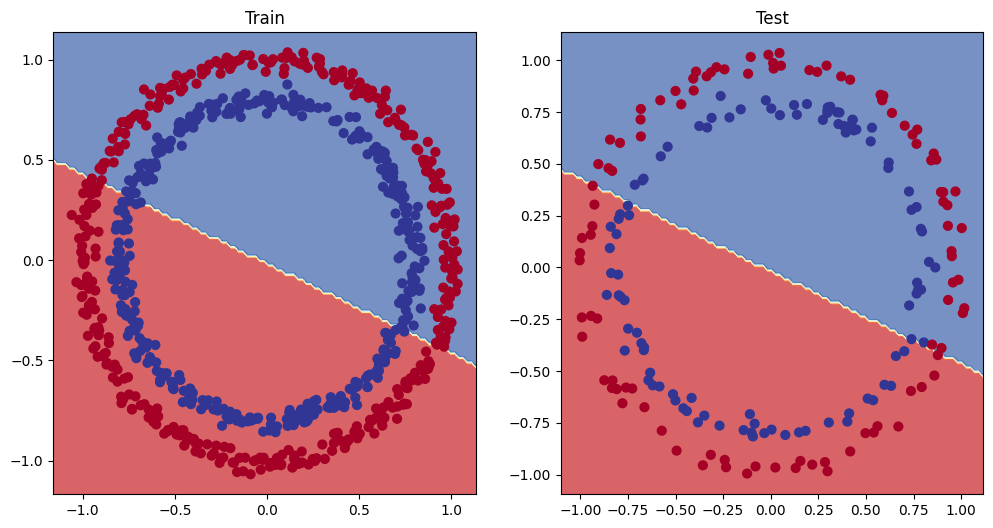

In [29]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)   # (row, col, index)
plt.title("Train")
plot_decision_boundary(m0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(m0, X_test, y_test)

* Model is underfitting: it's not learning predictive patterns from the data. It's trying to split the red and blue dots using a straight line.

* 50% accuracy. Since our data is circular, drawing a straight line can at best cut it down the middle.

# Improving a model (from a model perspective not data)
Hyperparameters: adjusted by hand.
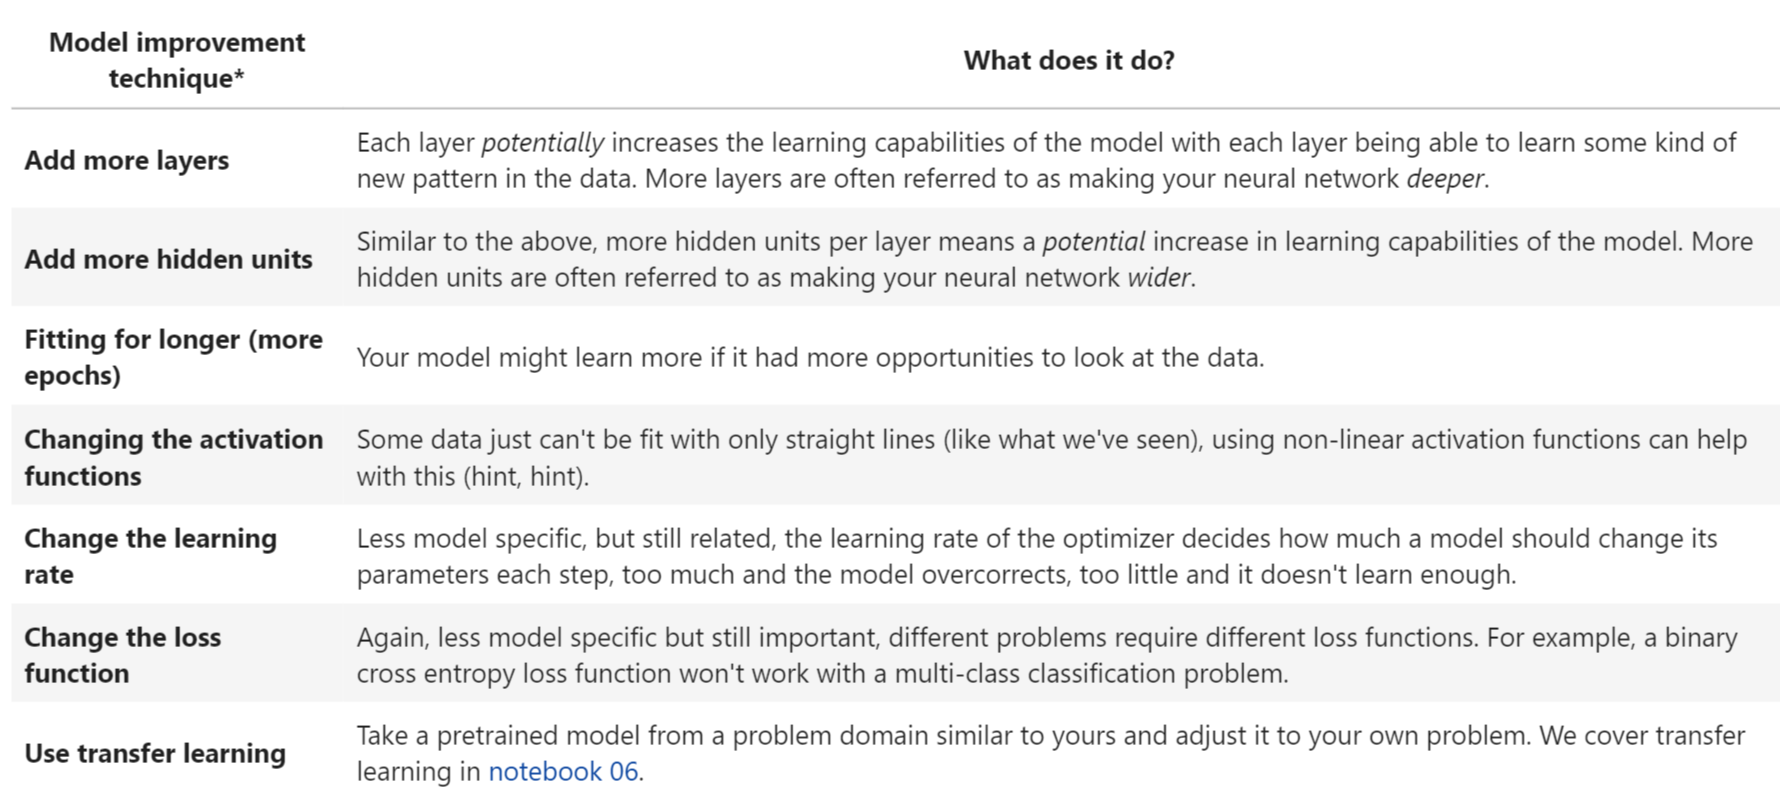


In [30]:
# Model 1

class Circle1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer and hidden units
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x)))  # generally benefits from speedups where possible.

m1 = Circle1().to(device)
m1

Circle1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [31]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(m1.parameters(), lr=0.1)

In [32]:
torch.manual_seed(42)

epochs = 1000 # Train for longer

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

    y_logits = m1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = lossf(y_logits, y_train)
    acc = accuracy(y_true=y_train, y_pred=y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### Testing
    m1.eval()
    with torch.inference_mode():

        test_logits = m1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy(y_true=y_test, y_pred=test_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%


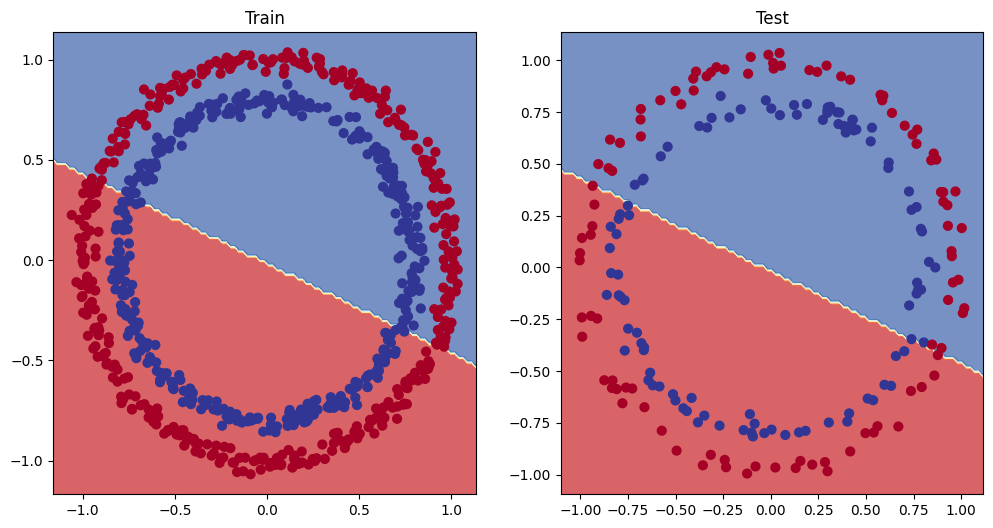

In [33]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(m1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(m1, X_test, y_test)

# Preparing data to see if our model can model a straight line

In [34]:
# Create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [35]:
# Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression),
    len(y_train_regression),
    len(X_test_regression),
    len(y_test_regression))

80 80 20 20


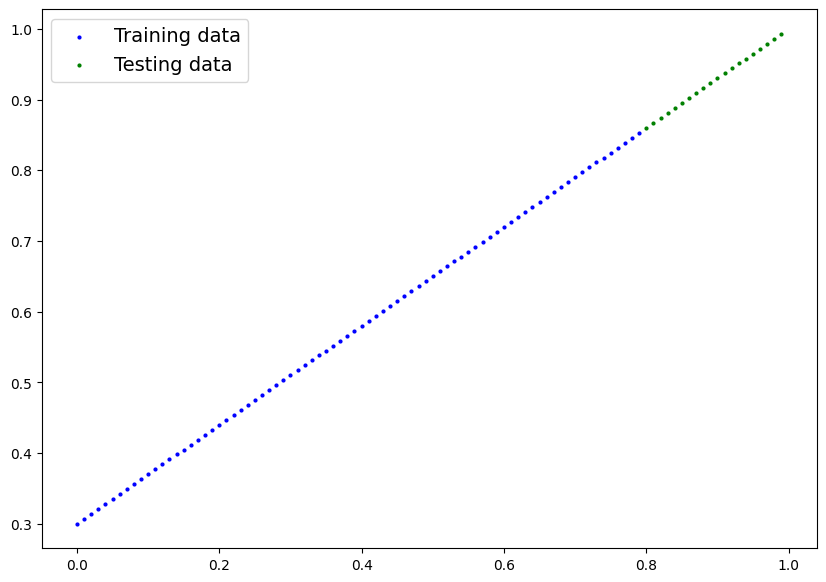

In [36]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

In [37]:
# Adjusting m1 to fit a straight line with a loss function suited to our regression data.

# Same architecture as m1 (but using nn.Sequential)
m2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

m2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [38]:
loss_fn = nn.L1Loss()  #MAE since regression
optimizer = torch.optim.SGD(m2.parameters(), lr=0.1)

In [39]:
# Train the model
torch.manual_seed(42)
epochs = 1000

X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):

    y_pred = m2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    m2.eval()
    with torch.inference_mode():
      test_pred = m2(X_test_regression)
      test_loss = loss_fn(test_pred, y_test_regression)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.75986, Test loss: 0.54143
Epoch: 100 | Train loss: 0.09309, Test loss: 0.02901
Epoch: 200 | Train loss: 0.07376, Test loss: 0.02850
Epoch: 300 | Train loss: 0.06745, Test loss: 0.00615
Epoch: 400 | Train loss: 0.06107, Test loss: 0.02004
Epoch: 500 | Train loss: 0.05698, Test loss: 0.01061
Epoch: 600 | Train loss: 0.04857, Test loss: 0.01326
Epoch: 700 | Train loss: 0.06109, Test loss: 0.02127
Epoch: 800 | Train loss: 0.05600, Test loss: 0.01425
Epoch: 900 | Train loss: 0.05571, Test loss: 0.00603


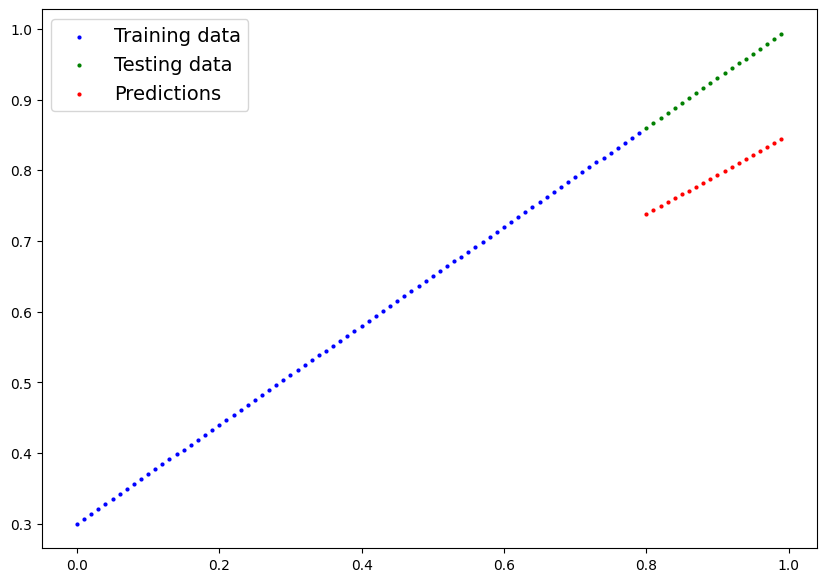

In [40]:
# Turn on evaluation mode
m2.eval()

with torch.inference_mode():
    y_preds = m2(X_test_regression)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

# Non-Linearity
Recreating non-linear data (red and blue circles)

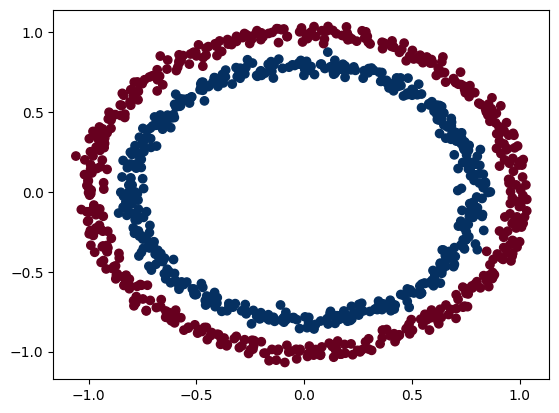

In [41]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000, noise=0.03, random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [42]:
# Convert to tensors and split into train and test sets
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

# Model with Non-linearity

* ANN = a large combo of linear and non-linear functions potentially able to find patterns in data.
* Put non-linear activation functions in between hidden layers and just after the output layer.

In [43]:
# Build model with non-linear activation function

from torch import nn
class Circle2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=16)
        self.layer_2 = nn.Linear(in_features=16, out_features=16)
        self.layer_3 = nn.Linear(in_features=16, out_features=8)
        self.layer_4 = nn.Linear(in_features=8, out_features=1)
        self.relu = nn.ReLU()

        # Can also put sigmoid in the model

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_4(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x))))))

m3 = Circle2().to(device)
print(m3)

Circle2(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=8, bias=True)
  (layer_4): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)


In [44]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(m3.parameters(), lr=0.1)

In [45]:
# Training a model with non-linearity

torch.manual_seed(42)
epochs = 2500

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    y_logits = m3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)
    acc = accuracy(y_true=y_train, y_pred=y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### Testing
    m3.eval()
    with torch.inference_mode():
      test_logits = m3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy(y_true=y_test, y_pred=test_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69418, Accuracy: 50.00% | Test Loss: 0.69364, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69183, Accuracy: 58.50% | Test Loss: 0.69133, Test Accuracy: 59.50%
Epoch: 200 | Loss: 0.69074, Accuracy: 56.25% | Test Loss: 0.69030, Test Accuracy: 59.50%
Epoch: 300 | Loss: 0.68921, Accuracy: 59.75% | Test Loss: 0.68888, Test Accuracy: 64.50%
Epoch: 400 | Loss: 0.68678, Accuracy: 57.88% | Test Loss: 0.68674, Test Accuracy: 63.50%
Epoch: 500 | Loss: 0.68286, Accuracy: 59.38% | Test Loss: 0.68334, Test Accuracy: 59.00%
Epoch: 600 | Loss: 0.67587, Accuracy: 61.00% | Test Loss: 0.67744, Test Accuracy: 62.00%
Epoch: 700 | Loss: 0.66149, Accuracy: 64.50% | Test Loss: 0.66580, Test Accuracy: 64.50%
Epoch: 800 | Loss: 0.62455, Accuracy: 87.12% | Test Loss: 0.63520, Test Accuracy: 82.50%
Epoch: 900 | Loss: 0.49481, Accuracy: 99.00% | Test Loss: 0.52315, Test Accuracy: 98.00%
Epoch: 1000 | Loss: 0.45807, Accuracy: 70.25% | Test Loss: 0.51331, Test Accuracy: 60.50%
Epoch: 1100 | Loss: 0.

In [46]:
# Make predictions

m3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(m3(X_test))).squeeze()
y_preds[:10], y[:10] # want preds in same format as truth labels

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

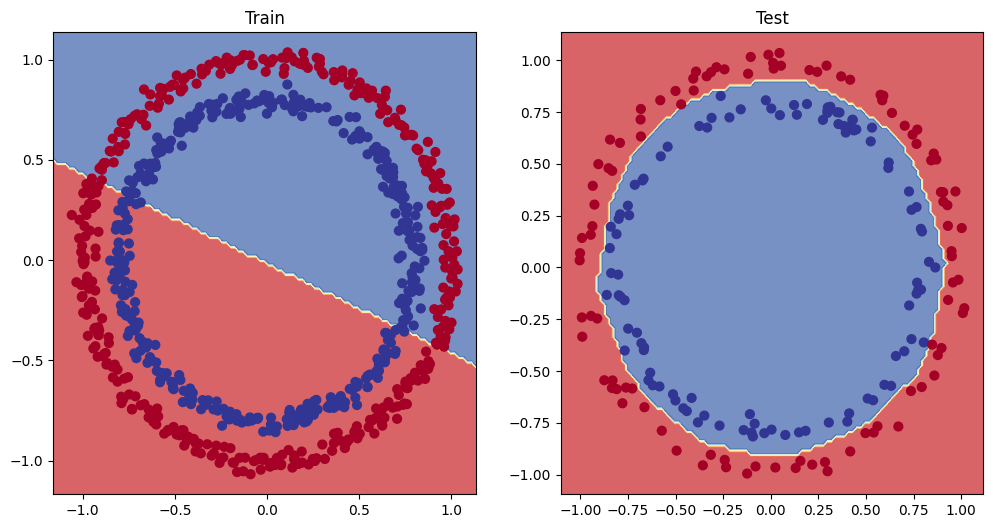

In [47]:
# Plot decision boundaries for training and test sets

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(m1, X_train, y_train) # linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(m3, X_test, y_test)   # non-linearity

# Replicating non-linear activation functions

> We give NN tools to discover patterns in data and it tries to find patterns on its own. Tools = linear and non-linear functions.


In [48]:
# Create a toy tensor (similar to the data going into our model)
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

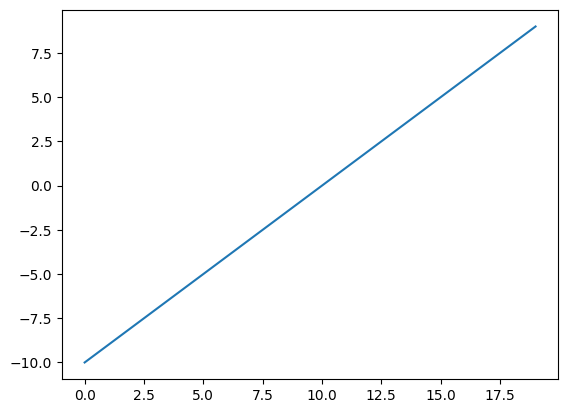

In [49]:
# Visualize the toy tensor
plt.plot(A);

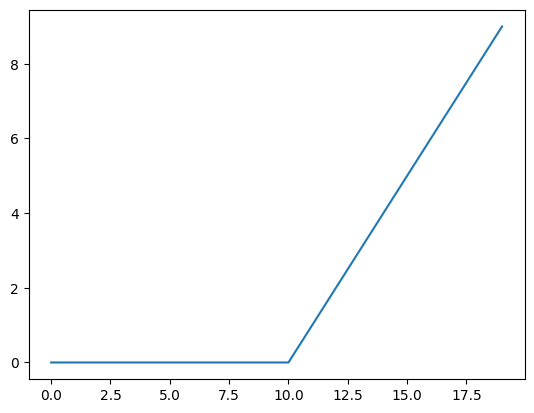

In [50]:
plt.plot(torch.relu(A));

##Recreate PyTorch's ReLU (torch.nn.ReLU)
 The ReLU function turns all negatives to 0 and leaves the positive values as they are.

In [51]:
def relu(x):
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

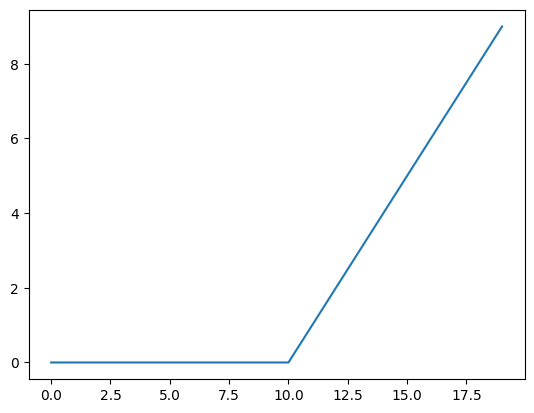

In [52]:
plt.plot(relu(A))

##Recreate Sigmoid



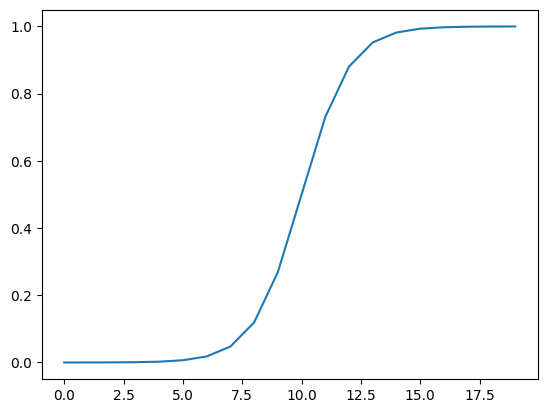

In [55]:
plt.plot(torch.sigmoid(A))

In [53]:
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

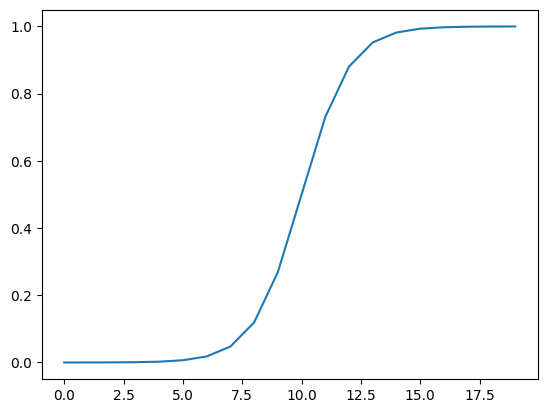

In [54]:
plt.plot(sigmoid(A))